In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [31]:
class StockMarketPredictor:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train, self.x_test, self.y_train, self.y_test = x_train, x_test, y_train, y_test
        self.model, self.history, self.predictions = None, None, None

    #Building the LSTM Model for the Stock Market Prediction and checking the loss occured during training
    def stock_prediction_model(self, epochs=100, batch_size = 8, verbose = 1):
        self.model = Sequential()
        self.model.add(LSTM(32, input_shape=(self.x_train.shape[1], self.x_train.shape[2]), activation='relu', return_sequences=False))
        self.model.add(Dense(1))
        self.model.compile(loss='mean_squared_error', optimizer='adam')
        print(self.model.summary())
        self.history = self.model.fit(self.x_train, self.y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle=False)
        plt.title('Loss during training')
        plt.plot(self.history.history['loss'])
        plt.show()
        self.predictions = self.model.predict(self.x_test)

    #Plotting the Graph comparing Actual values (test data used) with the predicted value made by the model
    def graphical_prediction(self):
        plt.figure(figsize=(15, 6))
        plt.plot(self.y_test, label='Actual Value')
        plt.plot(self.predictions, label='Predicted Value')
        plt.title('Actual vs Prediction')
        plt.xlabel('Year')
        plt.ylabel('USD')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.legend()
        plt.show()

In [32]:
#Loading the dataset and seting the index with respect to the date
apple_stock_dataset = pd.read_csv('/Users/nethanshaik/Desktop/Artificial Intelligence/AAPL.csv')
apple_stock_dataset.set_index('Date', inplace=True)
apple_stock_dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-11,42.762501,42.802502,42.312500,42.357498,40.777519,83973600
2019-02-12,42.525002,42.750000,42.424999,42.722500,41.128902,89134000
2019-02-13,42.847500,43.119999,42.480000,42.544998,40.958012,89960800
2019-02-14,42.427502,42.814999,42.345001,42.700001,41.107239,87342800
2019-02-15,42.812500,42.924999,42.437500,42.605000,41.015789,98507200


<Axes: xlabel='Date'>

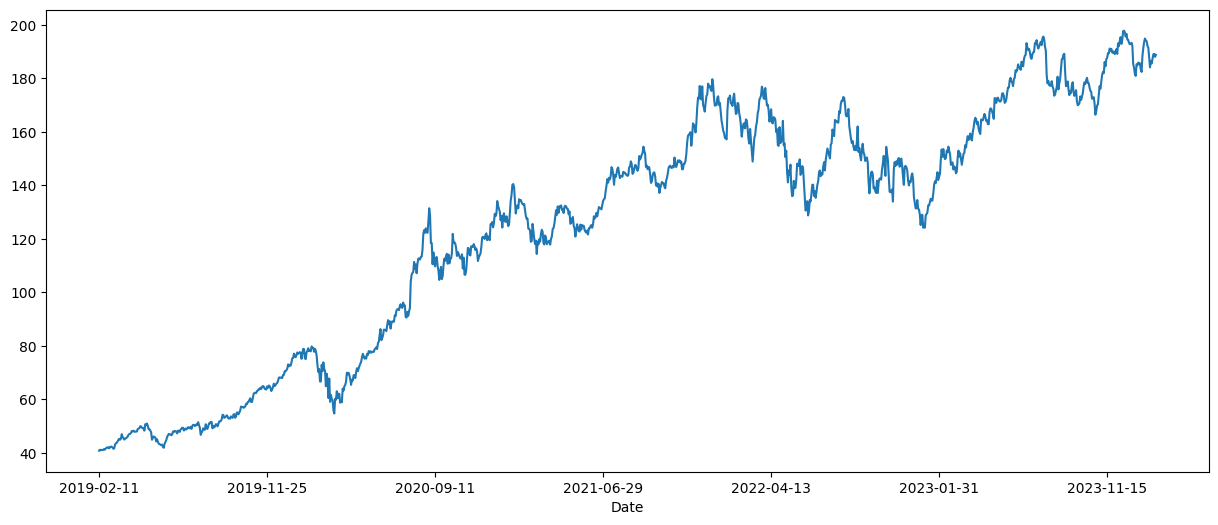

In [33]:
plt.figure(figsize=(15, 6))
apple_stock_dataset['Adj Close'].plot()

In [34]:
#Preprocessing the data
y = apple_stock_dataset['Adj Close']
sc = MinMaxScaler()
x = sc.fit_transform(apple_stock_dataset[['Open','High','Low','Volume']])
x = pd.DataFrame(x)

In [35]:
#Splitting the dataset into training and test data
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [36]:
#Reshapping the training and test dataset of the independent variables
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4736      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4769 (18.63 KB)
Trainable params: 4769 (18.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 15860.8330
Epoch 2/100
144/144 [==============================] - 0s 885us/step - loss: 15151.1514
Epoch 3/100
144/144 [==============================] - 0s 905us/step - loss: 13651.0371
Epoch 4/100
144/144 [==============================] - 0s 898us/step - loss: 11490.9219
Epoch 5/100
144/144 [==============================] - 0s 887

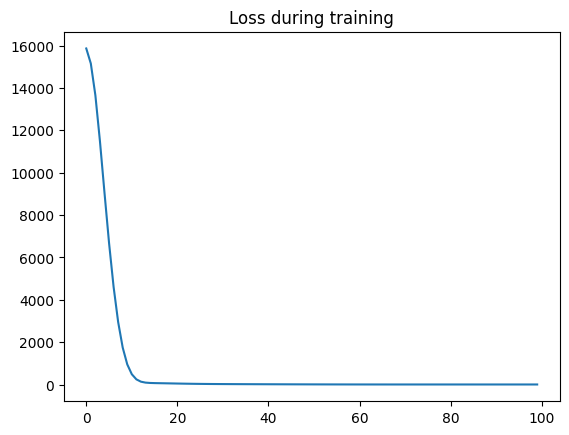

4/4 [==============================] - 0s 1ms/step


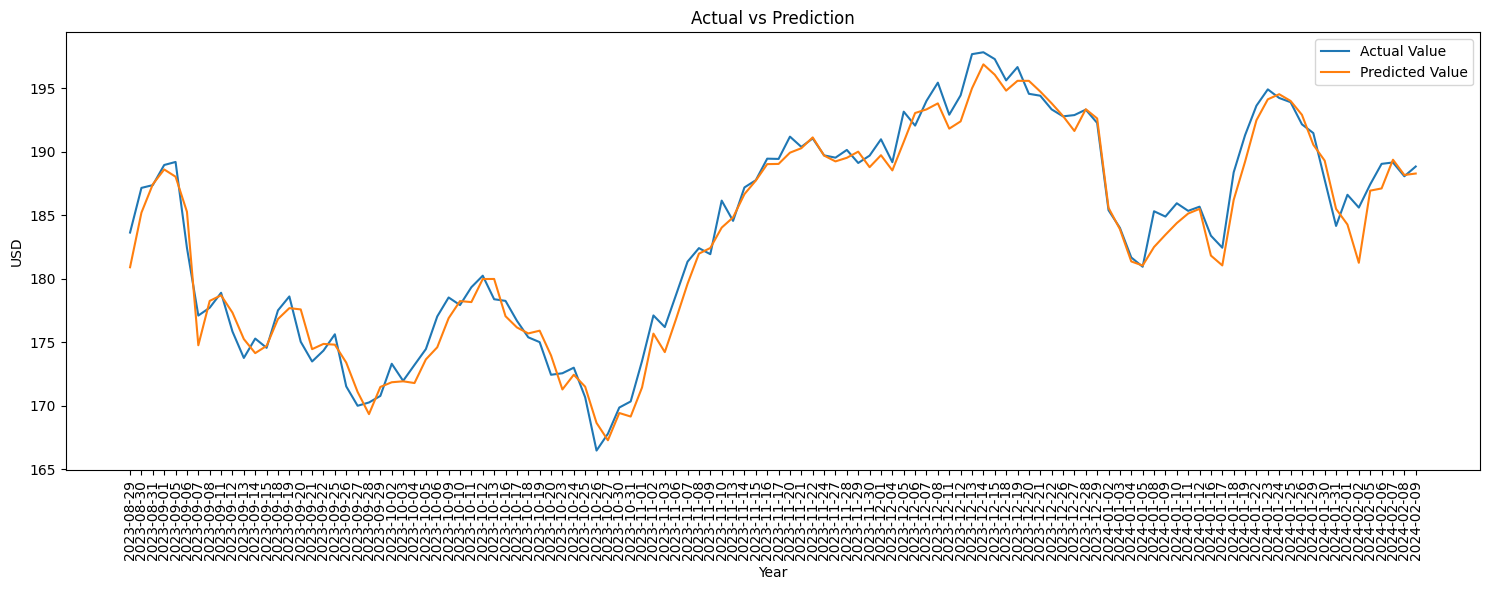

In [37]:
#Calling the functions of the Class
predictor = StockMarketPredictor(x_train, x_test, y_train, y_test)
predictor.stock_prediction_model()
predictor.graphical_prediction()

References:

1. https://en.wikipedia.org/wiki/Long_short-term_memory
2. https://databasecamp.de/en/ml/lstms